<a href="https://colab.research.google.com/github/EbrahimiAmirHosein/Projects-and-Assignment-BMG/blob/CSI5180_winter_2025/CSI_5180_Assignment_1_Amirhosein_Ebrahimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn as skl
from sklearn.manifold import TSNE

In [2]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.3 MB/s eta 0:00:00


In [3]:
from Bio.SeqIO.FastaIO import SimpleFastaParser

# Downloading data

In [4]:
!wget https://raw.githubusercontent.com/solovictor/CNNPromoterData/refs/heads/master/Arabidopsis_tata.fa
!wget https://raw.githubusercontent.com/solovictor/CNNPromoterData/refs/heads/master/Arabidopsis_non_tata.fa
!wget https://raw.githubusercontent.com/solovictor/CNNPromoterData/refs/heads/master/Arabidopsis_non_prom_big.fa

!ls

--2025-02-12 21:36:55--  https://raw.githubusercontent.com/solovictor/CNNPromoterData/refs/heads/master/Arabidopsis_tata.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 479040 (468K) [text/plain]
Saving to: ‘Arabidopsis_tata.fa’

Arabidopsis_tata.fa 100%[===================>] 467.81K  --.-KB/s    in 0.05s   

2025-02-12 21:36:56 (9.90 MB/s) - ‘Arabidopsis_tata.fa’ saved [479040/479040]

--2025-02-12 21:36:56--  https://raw.githubusercontent.com/solovictor/CNNPromoterData/refs/heads/master/Arabidopsis_non_tata.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

#Reading data

In [5]:
def read_fasta(fname):
  sequence = []
  sequence_id = []
  with open(fname) as handle:
      for seq_id, seq in SimpleFastaParser(handle):
         sequence.append(seq)
         sequence_id.append(seq_id)
  return np.array(sequence), np.array(sequence_id)

In [6]:
Arabidopsis_tata, Arabidopsis_tata_idx = read_fasta('Arabidopsis_tata.fa')
Arabidopsis_non_tata, Arabidopsis_non_tata_idx = read_fasta('Arabidopsis_non_tata.fa')
Arabidopsis_non_prom_big, Arabidopsis_non_prom_big_idx = read_fasta('Arabidopsis_non_prom_big.fa')

In [7]:
Arabidopsis_tata.shape , Arabidopsis_non_tata.shape, Arabidopsis_non_prom_big.shape

((1497,), (5905,), (11459,))

In [10]:
Arabidopsis_tata[1000]

'TGAAGAGTATCTTGACAATACCATTTACTTTACGATTTATGACAGACCAATATATGGGCTTCATTGGGGCTTCATTGGGGCTTCATTGAATTTCAAAGTCTGTTAAGGCCCAAACTGAGAGCGCGGTTGCACAAATTGTCGAAATTTCTCGAAACCGCTTTAATCTCGATATAAAGCTCGTCTGCTAAAAACCTTCGATTAGGGTTTTAGTCTGTAGAAACAAAGTTGCCGCTTCGATTCCAAGGAGTAAC'

# Ensuring sequences only have ```'A' 'T' 'G' 'C' ``` values





In [11]:
def remove_invalid(sequence):
  for sec in sequence:
    if 'N' in sec:
      print(f"Invalid char detected at {sec}")
      idx = np.where(sequence==sec)[0]
      sequence = np.delete(sequence, idx)
  return sequence

In [12]:
Arabidopsis_tata = remove_invalid(Arabidopsis_tata)
Arabidopsis_non_tata = remove_invalid(Arabidopsis_non_tata)
Arabidopsis_non_prom_big = remove_invalid(Arabidopsis_non_prom_big)

Invalid char detected at GATATCGTCACCATCCATCTACTCATTGAAGTTGGCAAAATGTGGGCTGAAGATAAGCTTAGATGATTGGAAGCTAGCAGGGACCTACTACTATGATTCCATCGATCTGTCTGAAAACGAGATCTCAGGGAGTCCGGCTAAGTTCCTCAGCCAGANGAAGTATCTGATGGAGTTCCGAGCGGCAGGGAACAAACTCCGATTCGATTTGGGGAAGCTGACGTTTGTGAGGACTCTTGAAACCTTGGATTTGT
Invalid char detected at AGGAATGAAGGAAGCAACTGATGGTTATGATGAGAACAGAATCTTGGGCCANGGAGGCCAAGGAACAGTCTACAAAGGTATATTACCGGACAACTCCATAGTTGCTATAAAGAAAGCTCGGCTTGGAGACAATAGCCAAGTAGAGCAGTTCATCAATGAAGTGCTTGTGCTTTCACAAATCAACCATAGGAACGTGGTCAAGCTCTTGGGCTGCTGTCTAGAGACTGAAGTTCCCTTGTTGGTCTATGAGT


In [13]:
kmer_dict = {}
k=2
sequence = 'GAAGAC'
for i in range(len(sequence) - k + 1):
    kmer = sequence[i:i+k]
    if kmer in kmer_dict:
        kmer_dict[kmer] += 1
    else:
        kmer_dict[kmer] = 1

kmer_dict

{'GA': 2, 'AA': 1, 'AG': 1, 'AC': 1}

In [16]:
def count_kmers(sequences, k):
    kmer_dict = {}
    for sequence in sequences:
        for i in range(len(sequence) - k + 1):
            kmer = sequence[i:i+k]
            if kmer in kmer_dict:
                kmer_dict[kmer] += 1
            else:
                kmer_dict[kmer] = 1
    return kmer_dict

# Count k-mers for each dataset
k = 6
tata_kmers = count_kmers(Arabidopsis_tata, k)
non_tata_kmers = count_kmers(Arabidopsis_non_tata, k)
non_prom_kmers = count_kmers(Arabidopsis_non_prom_big, k)

# Print the results
print("TATA-box k-mer counts:", tata_kmers)
# print("Non-TATA-box k-mer counts:", non_tata_kmers)
# print("Non-promoter k-mer counts:", non_prom_kmers)

TATA-box k-mer counts: {'CAAGTA': 108, 'AAGTAT': 127, 'AGTATC': 55, 'GTATCC': 27, 'TATCCT': 68, 'ATCCTA': 59, 'TCCTAC': 41, 'CCTACA': 47, 'CTACAT': 80, 'TACATA': 179, 'ACATAG': 55, 'CATAGA': 84, 'ATAGAT': 142, 'TAGATT': 151, 'AGATTA': 147, 'GATTAT': 128, 'ATTATA': 328, 'TTATAG': 121, 'TATAGG': 70, 'ATAGGA': 44, 'TAGGAG': 24, 'AGGAGT': 38, 'GGAGTG': 25, 'GAGTGA': 63, 'AGTGAC': 54, 'GTGACC': 27, 'TGACCG': 32, 'GACCGC': 17, 'ACCGCA': 30, 'CCGCAA': 37, 'CGCAAA': 76, 'GCAAAA': 221, 'CAAAAA': 801, 'AAAAAC': 763, 'AAAACA': 752, 'AAACAC': 264, 'AACACA': 276, 'ACACAA': 276, 'CACAAA': 314, 'ACAAAC': 251, 'CAAACT': 190, 'AAACTA': 266, 'AACTAT': 165, 'ACTATG': 44, 'CTATGT': 52, 'TATGTT': 117, 'ATGTTT': 184, 'TGTTTC': 170, 'GTTTCG': 70, 'TTTCGT': 149, 'TTCGTA': 67, 'TCGTAA': 87, 'CGTAAT': 85, 'GTAATA': 144, 'TAATAA': 512, 'AATAAA': 979, 'ATAAAA': 1048, 'TAAAAA': 997, 'AAAAAA': 2534, 'AAAAAT': 972, 'AAAATA': 880, 'AAATAA': 920, 'ATAAAG': 325, 'TAAAGT': 197, 'AAAGTA': 244, 'AGTATT': 114, 'GTATTT': 14

{'CAAG': 1,
 'AAGT': 4,
 'AGTA': 2,
 'GTAT': 3,
 'TATC': 2,
 'ATCC': 3,
 'TCCT': 2,
 'CCTA': 1,
 'CTAC': 1,
 'TACA': 3,
 'ACAT': 2,
 'CATA': 2,
 'ATAG': 2,
 'TAGA': 2,
 'AGAT': 2,
 'GATT': 1,
 'ATTA': 1,
 'TTAT': 1,
 'TATA': 4,
 'TAGG': 1,
 'AGGA': 1,
 'GGAG': 1,
 'GAGT': 3,
 'AGTG': 5,
 'GTGA': 3,
 'TGAC': 2,
 'GACC': 2,
 'ACCG': 1,
 'CCGC': 1,
 'CGCA': 1,
 'GCAA': 1,
 'CAAA': 3,
 'AAAA': 4,
 'AAAC': 2,
 'AACA': 1,
 'ACAC': 1,
 'CACA': 1,
 'ACAA': 2,
 'AACT': 1,
 'ACTA': 1,
 'CTAT': 1,
 'TATG': 1,
 'ATGT': 2,
 'TGTT': 3,
 'GTTT': 4,
 'TTTC': 3,
 'TTCG': 1,
 'TCGT': 1,
 'CGTA': 2,
 'GTAA': 3,
 'TAAT': 3,
 'AATA': 4,
 'ATAA': 5,
 'TAAA': 6,
 'AAAT': 3,
 'AAAG': 4,
 'TATT': 1,
 'ATTT': 2,
 'TTTT': 2,
 'TTTA': 2,
 'TTAA': 1,
 'AAGA': 1,
 'GATG': 1,
 'TGTA': 3,
 'AATC': 2,
 'ATCT': 2,
 'TCTT': 2,
 'CTTT': 1,
 'TTTG': 2,
 'TTGT': 2,
 'AATT': 1,
 'ATTG': 1,
 'TTGA': 2,
 'TGAG': 2,
 'GTGG': 2,
 'TGGT': 2,
 'GGTA': 1,
 'GTAG': 2,
 'TAGT': 2,
 'GTGT': 2,
 'GTTA': 1,
 'TTAC': 2,
 'TACG': 1,
 'AC

In [ ]:
def kmer_encoder(sequence, k):
  kmer_dict = {}

In [ ]:
df_subset = pd.DataFrame(columns = ['neg-non_prom','pos-tata', 'pos-non_tata'])

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_kmer_feature = tsne.fit_transform(kmer_feature)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1497 samples in 0.005s...
[t-SNE] Computed neighbors for 1497 samples in 0.905s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1497
[t-SNE] Computed conditional probabilities for sample 1497 / 1497
[t-SNE] Mean sigma: 0.012545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.341949
[t-SNE] KL divergence after 300 iterations: 2.605977


<ipython-input-25-f55f9873bb74>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

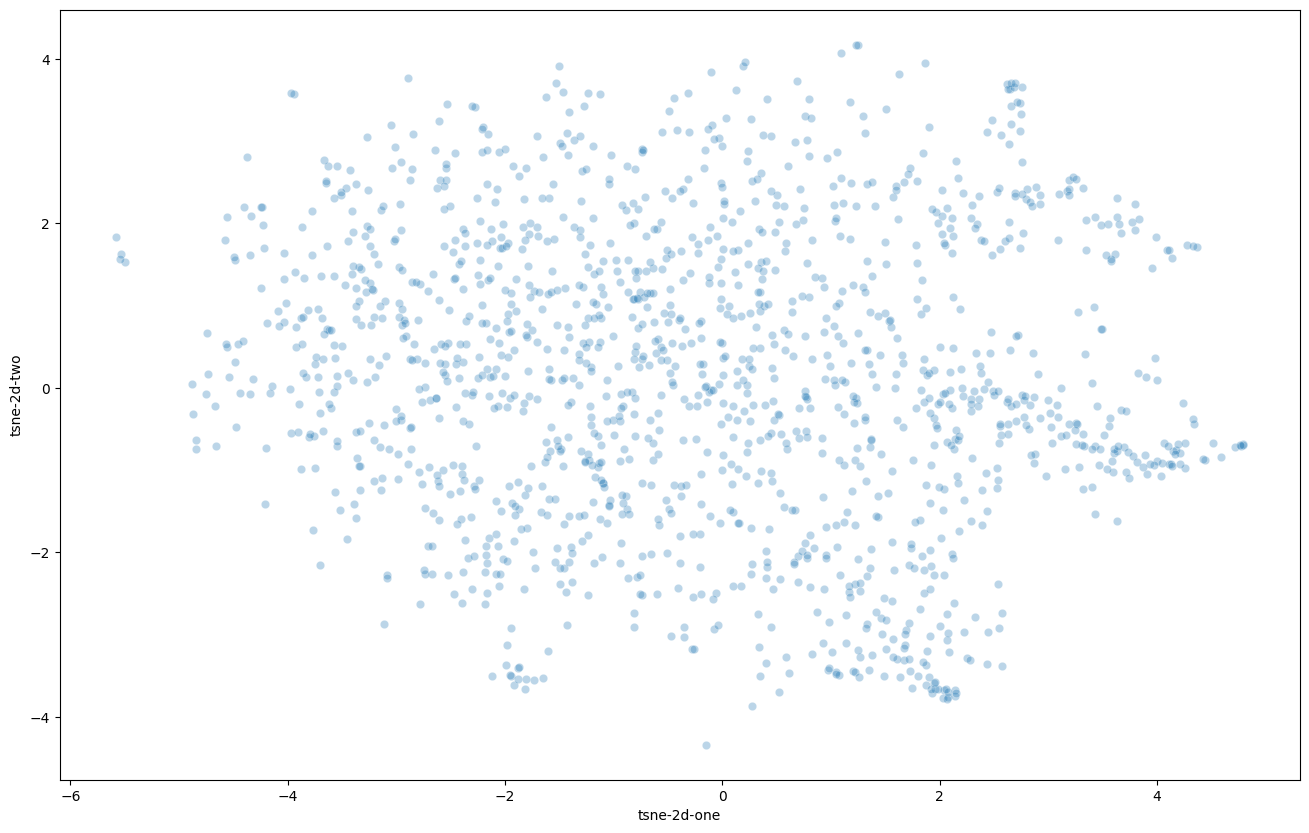

In [ ]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_kmer_feature[:,0]
df_subset['tsne-2d-two'] = tsne_kmer_feature[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)